<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero importamos las librerías que vayamos a necesitar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

Vamos a crear una clase Perceptron, que incluirá las variables que necesitaremos para hacer funcionar nuestro perceptron
Fijamos el bias a 1, como es común para una neurona, y inicializamos dos variables vacias para los pesos y los errores. También definimos el ratio de entrenamiento (lr) y el número de iteraciones (epochs).

***Funciones de la clase Perceptron:***

**__linear:** función encargada de realizar el cálculo y=w_0+w_1+⋯+w_n La función np.dot multiplica dos vectores elemento a elemento, que es lo que necesitamos.

**__activation_step:** función de activación. np.where nos devolverá el valor 1 cuando la entrada sea >0 y y el valor 0 en el resto de los casos

**fit:** Para cada una de las entradas, calculamos y_hat, que será la label estimada pos la red, y la comparamos con y_target (las labels del dataset de entrenamiento).

**predict:** función de predicción, que nos valdrá para hacer inferencia con nuevos datos una vez calculados los pesos

In [2]:
class Perceptron(object):
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.bias = 1
        self.epochs = epochs
        self.weights = None
        self.errors_ = []
    
    def __linear(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def __activation_step(self, Y):
        return np.where(Y>=0, 1, 0)

    def fit(self, X, y):
        
        assert len(X) == len(y), "X e Y deben tener la misma longitud"
        
        # Inicializa los pesos a 0, menos el peso del bias 
        # que se inicializa a 1 (self.bias)
        weights = np.zeros(X.shape[1])
        self.weights = np.insert(weights, 0, self.bias, axis=0)

        for _ in range(self.epochs):
            errors = 0
            for xi, y_target in zip(X, y):
                z = self.__linear(xi)  # Suma ponderada
                y_hat = self.__activation_step(z)  # Función de activación
                # Calculamos la diferencia entre entrada y salida, 
                # y aplicamos el learning rate
                delta = self.lr * (y_target - y_hat)  
        
                # Utilizmaos el parámetro delta calculado 
                # para actualizar los pesos
                self.weights[1:] += delta * xi
                self.weights[0] += delta
                
                errors += int(delta != 0.0)

            self.errors_.append(errors)
            #Interrumpimos el entrenamiento si el error es 0          
            if not errors:
                break

    def predict(self, X):
        assert type(self.weights) != 'NoneType', "Entrena el modelo primero."
        y_hat = np.zeros(X.shape[0],)
        for i, xi in enumerate(X):
            y_hat[i] = self.__activation_step(self.__linear(xi))
        return y_hat

    def score(sef, predictions, labels):
        return accuracy_score(labels, predictions)

    def plot(self, predictions, labels):
        assert type(self.weights) != 'NoneType',  "Entrena el modelo primero."
        plt.figure(figsize=(10,8))
        plt.grid(True)

        for input, target in zip(predictions, labels):
            plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'go')

        for i in np.linspace(np.amin(predictions[:,:1]),np.amax(predictions[:,:1])):
            slope = -(self.weights[0]/self.weights[2])/(self.weights[0]/self.weights[1])  
            intercept = -self.weights[0]/self.weights[2]

            # y = mx+b, equation of a line. mx = slope, n = intercept
            y = (slope*i) + intercept
            plt.plot(i, y, color='black', marker='x', linestyle='dashed')



1.0

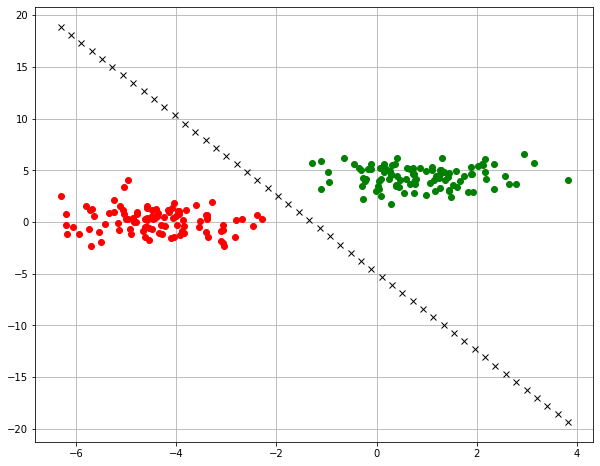

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# Generate data blobs, 2 features each with two classses
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Create an instance of our Perceptron
p = Perceptron()

# Fit the data, display and display our accuracy score
p.fit(X_train,y_train)
p.plot((X_test), y_test)
p.score(p.predict(X_test), y_test)